`Neural Network Regression w/TensorFlow`

### Coverage:
* Input/Output shapes of a reg model (features and labels)
* Architecture of a reg model
* Creating custom data to view and fit
* Steps in modelling `create a model, compile, fit, evaluate *CrCoFiEv*`
* Evaluation Methods
* Saving & Loading Models

In [79]:
# lets see how you do comments
import tensorflow as tf
import numpy as np
tf.__version__
import matplotlib.pyplot as plt

`Regression Inputs and Outputs`
* For a Reg problem, the shape of the [output] is normally 1; shape=[1] as we often try to predict some number.

In [80]:
# Create Features / inputs
X = np.array([-7, -4, -1, 2, 5, 8, 11, 14]) # uppercase 
# create labels
y = np.array([3,6,9,12,15,18,21,24]) #lower case
# visualize
# plt.scatter(X, y)

In [81]:
# what is the pattern btn the features and the labels
y == X + 10 # this is the relationship our neural net was supposed to learn

array([ True,  True,  True,  True,  True,  True,  True,  True])

`What then might the shapes be for our Input/Output`

In [82]:
X.shape, y.shape

((8,), (8,))

In [83]:
X, y

(array([-7, -4, -1,  2,  5,  8, 11, 14]),
 array([ 3,  6,  9, 12, 15, 18, 21, 24]))

In [84]:
# create a demo tensor for or housing price prediction problem
house = tf.constant(np.array([[10,11,12,13], [1,2,3,4], [6,7,8,9]]), dtype=tf.float32)
price = tf.constant([1243537])
house, price

(<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
 array([[10., 11., 12., 13.],
        [ 1.,  2.,  3.,  4.],
        [ 6.,  7.,  8.,  9.]], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1243537], dtype=int32)>)

In [85]:
# create demo with a string input
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([12489141])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([12489141], dtype=int32)>)

* wanna create a prediction feature : X[0] what is the equivalent y[?]

In [86]:
# turn the np arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=int64, numpy=array([-7, -4, -1,  2,  5,  8, 11, 14])>,
 <tf.Tensor: shape=(8,), dtype=int64, numpy=array([ 3,  6,  9, 12, 15, 18, 21, 24])>)

In [87]:
X[0].shape, y[0].shape # these are scalar values, have no dimension

(TensorShape([]), TensorShape([]))

### Prediction Feature : Building a model
* Creating a Model : `define input hidden and output layer`
* Compile the model : `define loss function and the optimizer and evaluation metric`
* Fit the Model : `let the model try to find patterns btn X(features) and y(labels)`

In [88]:
 # set random seed for reproducibility
tf.random.set_seed(42)

# # create a model using the Sequential API - this is a method of going through all things sequentially
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(1)
# ]) # create a list within Sequential Method instead of using .add

model = tf.keras.models.Sequential() # to create a model using Sequential API, shape must be defined
model.add(tf.keras.layers.Input(shape=(1,)))

model.add(tf.keras.layers.Dense(50, activation=None))
# model.add(tf.keras.layers.Dense(50, activation=None))
# model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(1))

# compile the model
model.compile(loss=tf.keras.losses.mae, # mean abs error
            optimizer=tf.keras.optimizers.Adam(lr=0.01), #stochastic gradient descend
            metrics=["mae"]
)

`metrics: human readable and interpretation over the models performance`

In [89]:
# fit the model - let us find patterns
model.fit(X, y, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 790ms/step - loss: 14.3352 - mae: 14.3352
Epoch 2/20
1/1 [==============================] - 0s 7ms/step - loss: 14.2680 - mae: 14.2680
Epoch 3/20
1/1 [==============================] - 0s 7ms/step - loss: 14.2009 - mae: 14.2009
Epoch 4/20
1/1 [==============================] - 0s 9ms/step - loss: 14.1339 - mae: 14.1339
Epoch 5/20
1/1 [==============================] - 0s 8ms/step - loss: 14.0668 - mae: 14.0668
Epoch 6/20
1/1 [==============================] - 0s 7ms/step - loss: 13.9998 - mae: 13.9998
Epoch 7/20
1/1 [==============================] - 0s 7ms/step - loss: 13.9329 - mae: 13.9329
Epoch 8/20
1/1 [==============================] - 0s 9ms/step - loss: 13.8659 - mae: 13.8659
Epoch 9/20
1/1 [==============================] - 0s 7ms/step - loss: 13.7990 - mae: 13.7990
Epoch 10/20
1/1 [==============================] - 0s 7ms/step - loss: 13.7321 - mae: 13.7321
Epoch 11/20
1/1 [==============================] - 0s 10ms/step - l

In [90]:
# make a predction for what x[17] should be
model.predict([17])

1/1 [==============================] - 0s 106ms/step


array([[1.7343472]], dtype=float32)

In [91]:
model.predict([12])

1/1 [==============================] - 0s 56ms/step


array([[1.2784235]], dtype=float32)

`Evaluating a Model` : visualize visualize visualize
* The data - what data are working with
* The Model - what does it look like
* The Training - how it perfomes as it learns
* The Predictions - how they lines up with ground truth (labeled data)

In [92]:
# create a larger model
X = tf.range(-100, 100, 4)
# create a larger label : (matmul)
y = tf.add(X,X)
X,y

(<tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
          76,   80,   84,   88,   92,   96], dtype=int32)>,
 <tf.Tensor: shape=(50,), dtype=int32, numpy=
 array([-200, -192, -184, -176, -168, -160, -152, -144, -136, -128, -120,
        -112, -104,  -96,  -88,  -80,  -72,  -64,  -56,  -48,  -40,  -32,
         -24,  -16,   -8,    0,    8,   16,   24,   32,   40,   48,   56,
          64,   72,   80,   88,   96,  104,  112,  120,  128,  136,  144,
         152,  160,  168,  176,  184,  192], dtype=int32)>)

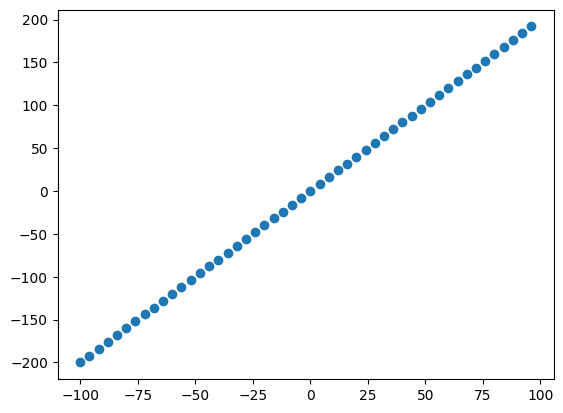

In [93]:
# visualize the data
plt.scatter(X,y)

`split X and y into a training and test set`

In [94]:
# # use scikit to perform the test and train
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.33)

In [95]:
# check the length of our data set
len(X), len(y)

(50, 50)

In [96]:
# spilt into an 80% & 20%
X_train = X[:40] # get the first 40 samples
y_train = y[:40]

X_test = X[40:] # last 10 elements
y_test = y[40:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

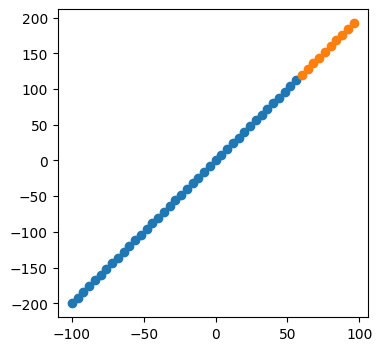

In [97]:
plt.figure(figsize=(4,4))
plt.scatter(X_train, y_train) # train
plt.scatter(X_test, y_test) #test

In [98]:
# Build a Neural Net that learns a relationship btn X and y; such that it can predict the X and y values
# Create -> Compile -> Fit

#1. Create the Model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]), #we are trying to predict only one input vs output value
])

#2. Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),
loss=tf.keras.losses.mae,
metrics=["mae"]
)
#3. Fit the model
# model.fit(X_train, y_train, epochs=2000)

`For visualizing`

In [99]:
# what type of data are we dealing with - determines the input_shape
# one input for one output
X_train[0], y_train[0] #single numbers

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-200>)

In [100]:
# set the seed for reproducibility
tf.random.set_seed(42)
# create the model; but specify the input shape on the first layer
viz_model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1]), # dealing with scalar data
])
# compile the model
viz_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    loss=tf.keras.losses.mae,
    metrics=['mae']
    )

In [101]:
# visualize the model before running it.
viz_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [102]:
# Fit our original model, this is after observing the structure of our model

model.fit(X_train, y_train, epochs=20, verbose=2) # training_data(X_train), label_data(y_train)

Epoch 1/20
2/2 - 1s - loss: 138.5139 - mae: 138.5139 - 520ms/epoch - 260ms/step
Epoch 2/20
2/2 - 0s - loss: 102.5299 - mae: 102.5299 - 7ms/epoch - 4ms/step
Epoch 3/20
2/2 - 0s - loss: 64.4090 - mae: 64.4090 - 8ms/epoch - 4ms/step
Epoch 4/20
2/2 - 0s - loss: 27.5246 - mae: 27.5246 - 7ms/epoch - 3ms/step
Epoch 5/20
2/2 - 0s - loss: 7.1510 - mae: 7.1510 - 9ms/epoch - 4ms/step
Epoch 6/20
2/2 - 0s - loss: 4.7385 - mae: 4.7385 - 6ms/epoch - 3ms/step
Epoch 7/20
2/2 - 0s - loss: 4.8435 - mae: 4.8435 - 6ms/epoch - 3ms/step
Epoch 8/20
2/2 - 0s - loss: 4.8707 - mae: 4.8707 - 8ms/epoch - 4ms/step
Epoch 9/20
2/2 - 0s - loss: 9.8039 - mae: 9.8039 - 7ms/epoch - 3ms/step
Epoch 10/20
2/2 - 0s - loss: 12.2279 - mae: 12.2279 - 7ms/epoch - 3ms/step
Epoch 11/20
2/2 - 0s - loss: 8.9576 - mae: 8.9576 - 10ms/epoch - 5ms/step
Epoch 12/20
2/2 - 0s - loss: 11.9067 - mae: 11.9067 - 7ms/epoch - 4ms/step
Epoch 13/20
2/2 - 0s - loss: 12.3321 - mae: 12.3321 - 6ms/epoch - 3ms/step
Epoch 14/20
2/2 - 0s - loss: 21.1629 

In [103]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.predict([96])

1/1 [==============================] - 0s 243ms/step


array([[155.45285]], dtype=float32)

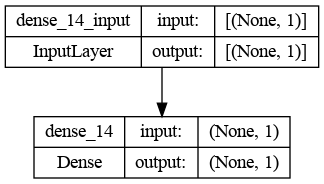

In [105]:
# another visualizing feature
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

##### Proceeding with the viz_model

In [106]:
# set seed for reproducibility
tf.random.set_seed(42)

# create a viz model; Also, going to practise layer and model naming.
viz_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name='first_input_layer'),
    tf.keras.layers.Dense(1, name='output_first_input_layer')
], name="Model_for_Visualization")

#compile the model
viz_model.compile(
    optimizer=tf.keras.optimizers.Adam(lr=0.01),
    metrics='mae',
    loss= tf.losses.mae
)

In [107]:
viz_model.summary()

Model: "Model_for_Visualization"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_input_layer (Dense)   (None, 10)                20        
                                                                 
 output_first_input_layer (D  (None, 1)                11        
 ense)                                                           
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### `Visualizing Model Predictions`

In [108]:
y_pred = model.predict(X_test) # predict on the test data
y_pred.shape, y_test.shape # compare the predicted value using the test data using the actual values [y_test]

1/1 [==============================] - 0s 323ms/step


((10, 1), TensorShape([10]))

`Create a Plotting Function`

In [109]:
def plot_prediction(
    train_data = X_train,
    train_labels = y_train,
    test_data = X_test,
    test_labels = y_test,
    predictions=y_pred):

    """
    Plots training_data, test_data and compares prediction to ground truth labels [y_test]
    """
    plt.figure(figsize=(5,5))
    # plot the traing data
    plt.scatter(train_data, train_labels, label="Training_Data")
    # # plot the testing data
    plt.scatter(test_data, test_labels, label="Testing_Data")
    # # plot the predictions
    plt.scatter(test_data, predictions)
    # plt.legend();
    # plt.show()

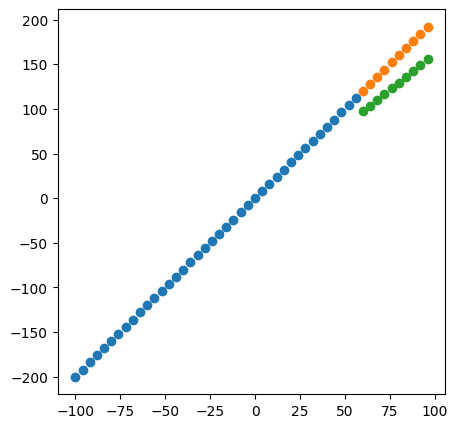

In [110]:
# call the function
plot_prediction(predictions=tf.squeeze(y_pred))

### `Regression Evaluation Metrics`

In [111]:
model.evaluate(X_test, y_test) # evaluation is carried outon the test dataset.
# returns - loss, mae

1/1 [==============================] - 1s 811ms/step - loss: 29.6943 - mae: 29.6943


[29.694255828857422, 29.694255828857422]

#### be metric specific

In [112]:
tf.metrics.mean_absolute_error(y_test, y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([58.84137 , 52.364235, 45.8871  , 39.409958, 33.546257, 28.673412,
       24.791424, 22.200567, 20.604855, 20.      ], dtype=float32)>

In [113]:
loss = tf.keras.losses.mean_absolute_error(y_true=y_test, y_pred=y_pred)
loss

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([58.84137 , 52.364235, 45.8871  , 39.409958, 33.546257, 28.673412,
       24.791424, 22.200567, 20.604855, 20.      ], dtype=float32)>

In [114]:
y_pred.shape, y_test.shape
# we ran into errors above due to differing shapes.
# thereofe, we can add or squeeze a tensor.. lets do so on y_pred

((10, 1), TensorShape([10]))

In [115]:
# squeeze y_pred
y_pred_sq = tf.squeeze(y_pred)

In [116]:
y_pred_sq.shape

TensorShape([10])

In [117]:
# running the loss functions after squeezing
loss_mae = tf.metrics.mean_absolute_error(y_test, y_pred_sq)
loss_mae.numpy()

29.694256

`we get an output as of 10.292981 - this output is similar to the one by the model metric`

In [118]:
loss_mse = tf.keras.losses.mean_squared_error(y_pred=y_pred_sq, y_true=y_test)
loss_mse.numpy()

900.88165

#### Build Model_2
* 2 dense layers 
* trained for 100 epochs

In [119]:
# set the random seed
tf.random.set_seed(42)

#create the model - 2Dense
model_2 = tf.keras.Sequential(
   [ tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)]
)

# compile the model
model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["mse"] #note: mse values are much higher than mae
)

# fit the model
model_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
2/2 [==============================] - 3s 49ms/step - loss: 71.0194 - mse: 8450.1719
Epoch 2/200
2/2 [==============================] - 0s 25ms/step - loss: 61.7595 - mse: 6317.3691
Epoch 3/200
2/2 [==============================] - 0s 24ms/step - loss: 77.8158 - mse: 9296.5039
Epoch 4/200
2/2 [==============================] - 0s 23ms/step - loss: 33.2880 - mse: 1661.8337
Epoch 5/200
2/2 [==============================] - 0s 27ms/step - loss: 20.5652 - mse: 1152.8546
Epoch 6/200
2/2 [==============================] - 0s 24ms/step - loss: 25.8458 - mse: 1069.9723
Epoch 7/200
2/2 [==============================] - 0s 32ms/step - loss: 28.6869 - mse: 1187.9496
Epoch 8/200
2/2 [==============================] - 0s 31ms/step - loss: 29.2925 - mse: 1498.6895
Epoch 9/200
2/2 [==============================] - 0s 33ms/step - loss: 70.9005 - mse: 7160.0063
Epoch 10/200
2/2 [==============================] - 0s 27ms/step - loss: 30.7195 - mse: 1335.8147
Epoch 11/200
2/2 [===========

In [120]:
# from function_prediction import plot_prediction

y_pred_2 = model_2.predict(X_test)  

1/1 [==============================] - 0s 405ms/step


In [121]:
# inspect the shape:
y_pred_2.shape, y_test.shape
# we get [10,10] for the pred
# a [10] for the test 

((10, 1), TensorShape([10]))

In [122]:
# however they have to be of the same shape.
# y_pred_2_sq = tf.squeeze(y_pred_2)

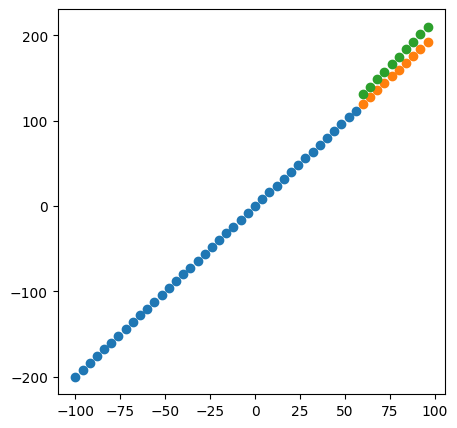

In [123]:
plot_prediction(predictions=tf.squeeze(y_pred_2))

In [124]:
# compare the mean errors of model_2: y_test vs y_pred
mae_2 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_2))
mse_2 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_2))

In [125]:
mae.numpy(), mse.numpy()

(0.07100372, 0.005137784)

#### `Build Model 3`

In [126]:
# set a random seed
tf.random.set_seed(42)

#create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(
    loss = tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["mae"]
)

# fit the model -> train the model (training dataset)
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 4s 50ms/step - loss: 115.5396 - mae: 115.5396
Epoch 2/500
2/2 [==============================] - 0s 26ms/step - loss: 114.8765 - mae: 114.8765
Epoch 3/500
2/2 [==============================] - 0s 47ms/step - loss: 114.2344 - mae: 114.2344
Epoch 4/500
2/2 [==============================] - 0s 29ms/step - loss: 113.5823 - mae: 113.5823
Epoch 5/500
2/2 [==============================] - 0s 34ms/step - loss: 112.9423 - mae: 112.9423
Epoch 6/500
2/2 [==============================] - 0s 29ms/step - loss: 112.2968 - mae: 112.2968
Epoch 7/500
2/2 [==============================] - 0s 35ms/step - loss: 111.6458 - mae: 111.6458
Epoch 8/500
2/2 [==============================] - 0s 24ms/step - loss: 110.9703 - mae: 110.9703
Epoch 9/500
2/2 [==============================] - 0s 32ms/step - loss: 110.3428 - mae: 110.3428
Epoch 10/500
2/2 [==============================] - 0s 44ms/step - loss: 109.7083 - mae: 109.7083
Epoch 11/500
2/2 [===========

1/1 [==============================] - 0s 374ms/step


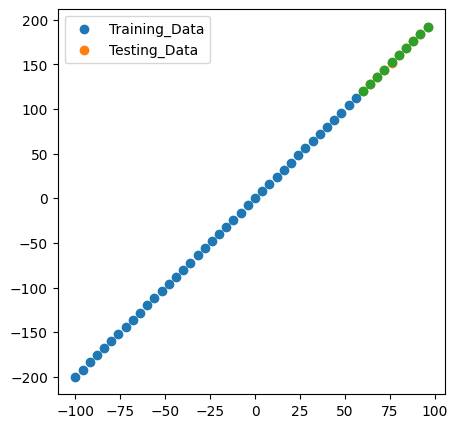

In [127]:
y_pred_3 = model_3.predict(X_test)
plot_prediction(predictions =tf.squeeze(y_pred_3))
plt.legend();

In [128]:
# evaluate the models perfomance on mean errors - y_test vs y_pred
mse_3 = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred_3))
mse.numpy()

0.005137784

In [129]:
mae_3 = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred_3))
mae.numpy()

0.07100372

#### `Compare Model's Results using a Panda's DF`

In [130]:
import pandas as pd 

model_results = [
    ["model_1", loss_mae.numpy(), loss_mse.numpy()],
    ["model_2", mae_2.numpy(), mse_2.numpy()],
    ["model_3", mae_3.numpy(), mse_3.numpy()]
]

all_results = pd.DataFrame(model_results, columns=["model", "mean abs", "mean sq."])
all_results

,model,mean abs,mean sq.
0,model_1,29.694256,900.881653
1,model_2,14.770787,222.962814
2,model_3,0.063417,0.004109


In [131]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [132]:
# used within the pure tensorflow code
model_3.save('model_3_format')

INFO:tensorflow:Assets written to: model_3_format/assets


INFO:tensorflow:Assets written to: model_3_format/assets


In [136]:
# used outside the tensorflow environment
model_3.save("model_3_hdf5_format.h5") #- just a single file

`load saved model - savedModel format`

In [142]:
load_savedmodel_formt = tf.keras.models.load_model("../Night/model_3_format")
load_savedmodel_formt.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [143]:
# confirm if the model is the same - make predictions with load_savedmodel_frmat

model_3_preds  = model_3.predict(X_test)
load_savedmodel_formt_preds = model_3.predict(X_test)

# test for equality of prediction
model_3_preds == load_savedmodel_formt_preds

1/1 [==============================] - 0s 54ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

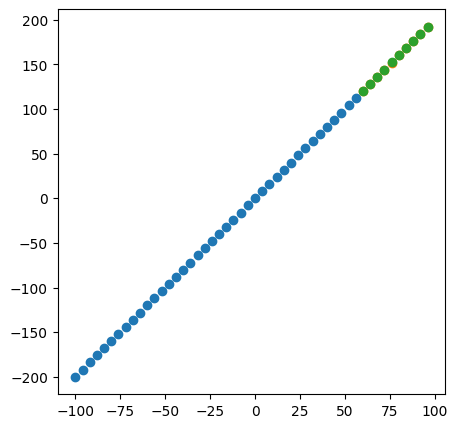

In [144]:
plot_prediction(predictions=model_3_preds)

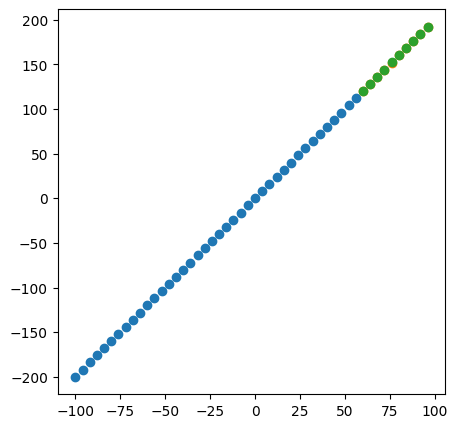

In [145]:
plot_prediction(predictions=load_savedmodel_formt_preds)

In [146]:
# loading the h5 format and making pred on it

load_h5 = tf.keras.models.load_model("../Night/model_3_hdf5_format.h5")
load_h5.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 10)                20        
                                                                 
 dense_19 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [148]:
h5_pred = load_h5.predict(X_test)
# model_3_preds
model_3_preds == h5_pred

1/1 [==============================] - 0s 36ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])